# Задание 1. Обнаружение и обработка пропущенных значений

## 1. Загрузите датасет titanic .<br>2. Определите количество пропущенных значений в каждом столбце.<br>3. Визуализируйте пропуски с помощью библиотеки missingno .<br>4. Заполните пропущенные значения:<br>признак age — средним значением;<br>признак embarked — наиболее частым значением;<br>признак deck — удалите.<br>5. Отобразите информацию о таблице до и после обработки ( .info() , .isna().sum() ).

1. Датасет загружен:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

2. Пропущенные значения ДО обработки:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class  

<Figure size 1000x500 with 0 Axes>

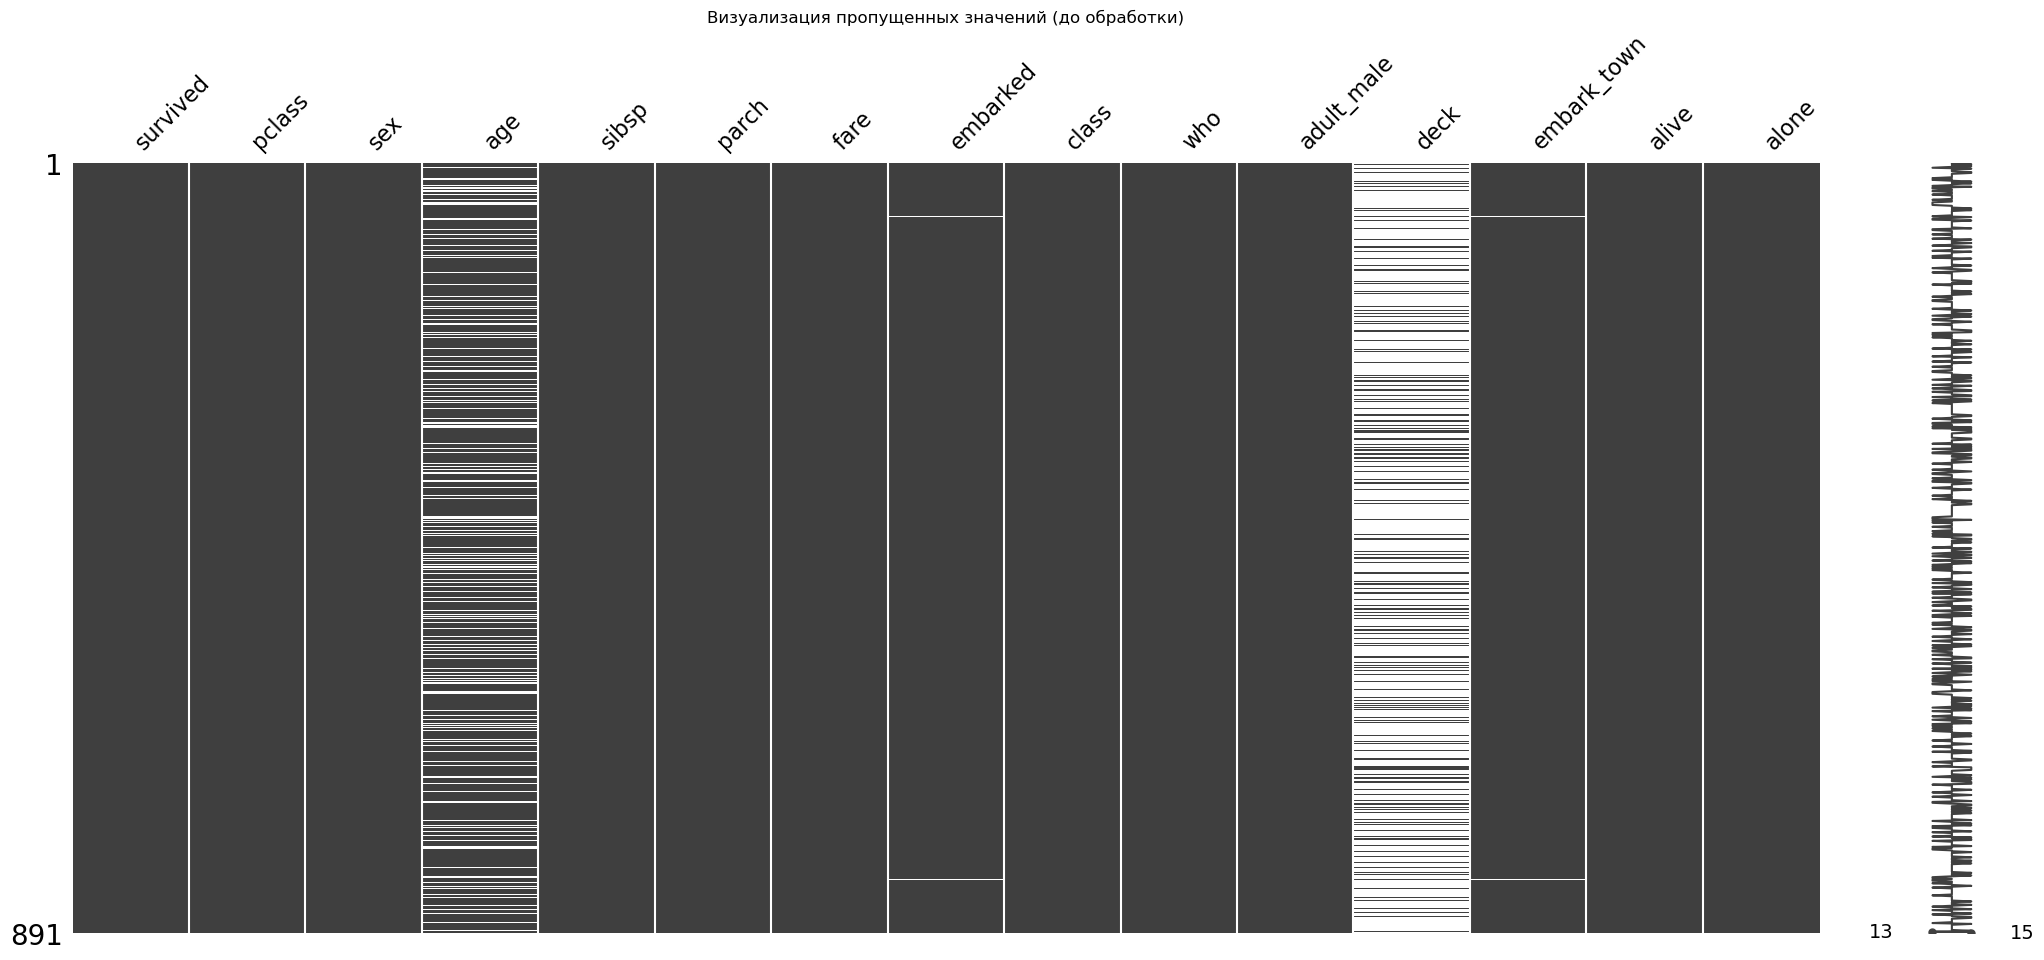


3. Информация ДО обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

4. Пропущенные значения ПОСЛЕ обработки:
survived

<Figure size 1000x500 with 0 Axes>

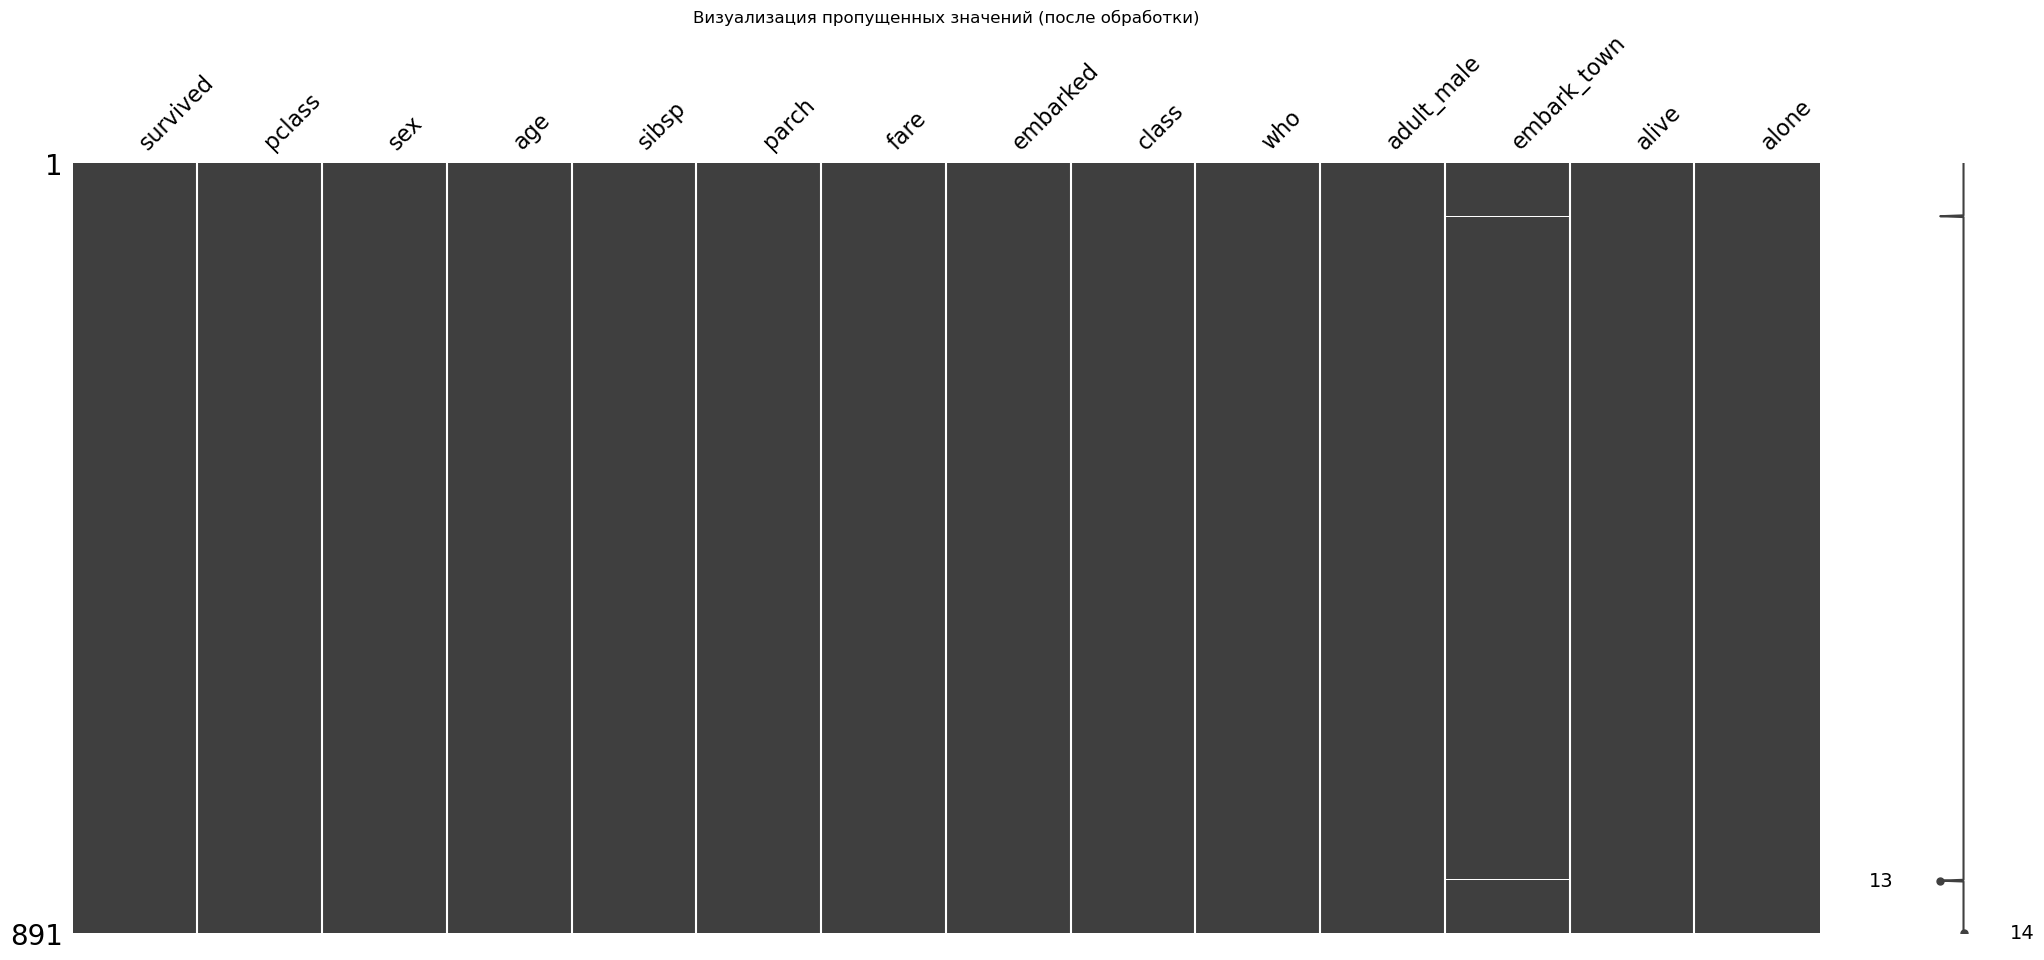

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
titanic = sns.load_dataset("titanic")
print("1. Датасет загружен:")
print(titanic.head())
print("\n2. Пропущенные значения ДО обработки:")
print(titanic.isna().sum())
plt.figure(figsize=(10, 5))
msno.matrix(titanic)
plt.title("Визуализация пропущенных значений (до обработки)")
plt.show()
titanic_processed = titanic.copy()
titanic_processed['age'] = titanic_processed['age'].fillna(titanic_processed['age'].mean())
mode_embarked = titanic_processed['embarked'].mode()[0]
titanic_processed['embarked'] = titanic_processed['embarked'].fillna(mode_embarked)
titanic_processed = titanic_processed.drop('deck', axis=1)
print("\n3. Информация ДО обработки:")
titanic.info()
print("\n4. Пропущенные значения ПОСЛЕ обработки:")
print(titanic_processed.isna().sum())
print("\n5. Информация ПОСЛЕ обработки:")
titanic_processed.info()
plt.figure(figsize=(10, 5))
msno.matrix(titanic_processed)
plt.title("Визуализация пропущенных значений (после обработки)")
plt.show()

# Задание 2. Обнаружение и удаление выбросов

## 1. Загрузите датасет penguins .<br>2. Постройте boxplot-графики для признаков bill_length_mm , bill_depth_mm , flipper_length_mm , body_mass_g . <br>3. Используя метод межквартильного размаха (IQR), выявите и удалите выбросы по каждому из указанных признаков.<br>4. Сравните размеры датасета до и после фильтрации.<br>5. Постройте boxplot-график до и после удаления выбросов для одного из признаков.

1. Датасет загружен. Размер до обработки: (344, 7)
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


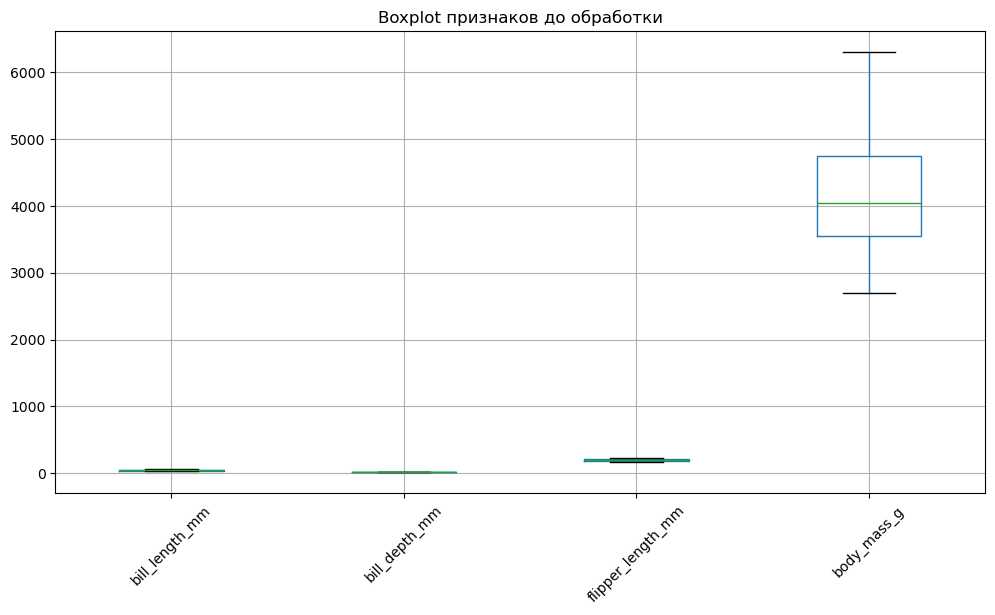


Размер датасета до обработки: (344, 7)
Размер датасета после обработки: (342, 7)
Удалено записей: 2


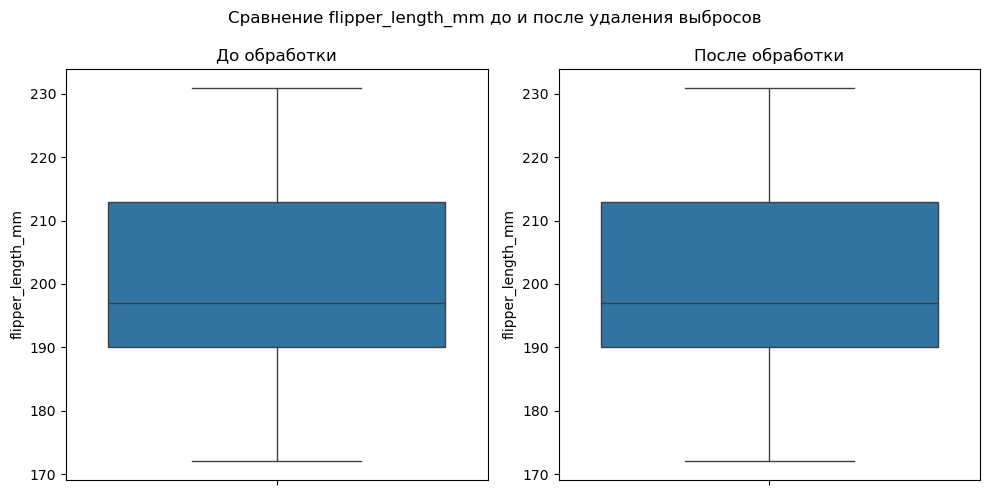

In [9]:
penguins = sns.load_dataset('penguins')
print("1. Датасет загружен. Размер до обработки:", penguins.shape)
print(penguins.head())
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
plt.figure(figsize=(12, 6))
penguins[numeric_cols].boxplot()
plt.title('Boxplot признаков до обработки')
plt.xticks(rotation=45)
plt.show()
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
penguins_clean = penguins.copy()
for col in numeric_cols:
    penguins_clean = remove_outliers(penguins_clean, col)
print("\nРазмер датасета до обработки:", penguins.shape)
print("Размер датасета после обработки:", penguins_clean.shape)
print(f"Удалено записей: {len(penguins) - len(penguins_clean)}")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=penguins['flipper_length_mm'])
plt.title('До обработки')
plt.subplot(1, 2, 2)
sns.boxplot(y=penguins_clean['flipper_length_mm'])
plt.title('После обработки')
plt.suptitle('Сравнение flipper_length_mm до и после удаления выбросов')
plt.tight_layout()
plt.show()

# Задание 3. Масштабирование числовых признаков

## 1. Загрузите данные с помощью fetch_california_housing(as_frame=True) .<br>2. Преобразуйте данные в pandas.DataFrame .<br>3. Выполните:<br>стандартизацию признаков с помощью StandardScaler ;<br>нормализацию в диапазон [0, 1] с помощью MinMaxScaler (на копиитаблицы).<br>4. Постройте гистограммы распределения признака MedInc до и после масштабирования.<br>5. Сравните поведение шкал на гистограммах.

1. Данные загружены. Описание:
 .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...

2. Первые 5 строк DataFrame:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  

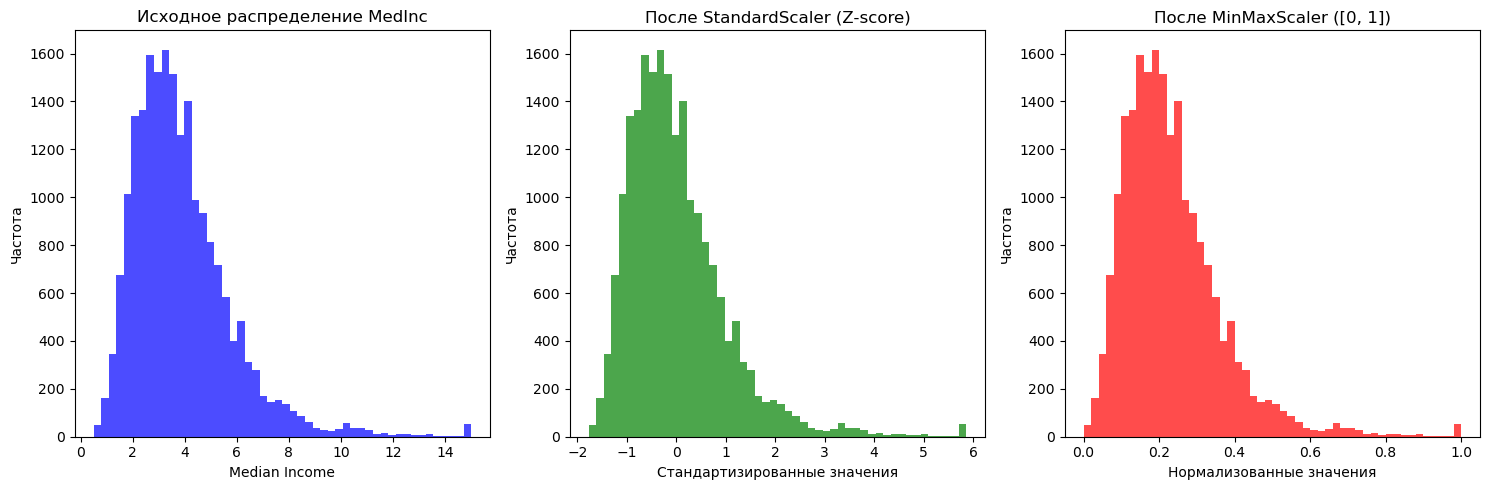


5. Сравнение статистик MedInc:
       Original  Standardized  Normalized
count  20640.00      20640.00    20640.00
mean       3.87          0.00        0.23
std        1.90          1.00        0.13
min        0.50         -1.77        0.00
25%        2.56         -0.69        0.14
50%        3.53         -0.18        0.21
75%        4.74          0.46        0.29
max       15.00          5.86        1.00


In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

california = fetch_california_housing(as_frame=True)
print("1. Данные загружены. Описание:\n", california.DESCR[:500] + "...")
df = california.frame
print("\n2. Первые 5 строк DataFrame:")
print(df.head())
original_medinc = df['MedInc'].copy()
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[df.columns] = scaler.fit_transform(df)
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df.columns] = minmax_scaler.fit_transform(df)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(original_medinc, bins=50, color='blue', alpha=0.7)
plt.title('Исходное распределение MedInc')
plt.xlabel('Median Income')
plt.ylabel('Частота')
plt.subplot(1, 3, 2)
plt.hist(df_standardized['MedInc'], bins=50, color='green', alpha=0.7)
plt.title('После StandardScaler (Z-score)')
plt.xlabel('Стандартизированные значения')
plt.ylabel('Частота')
plt.subplot(1, 3, 3)
plt.hist(df_normalized['MedInc'], bins=50, color='red', alpha=0.7)
plt.title('После MinMaxScaler ([0, 1])')
plt.xlabel('Нормализованные значения')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()
print("\n5. Сравнение статистик MedInc:")
comparison = pd.DataFrame({
    'Original': original_medinc.describe(),
    'Standardized': df_standardized['MedInc'].describe(),
    'Normalized': df_normalized['MedInc'].describe()
})
print(comparison.round(2))

# Задание 4. Кодирование категориальных признаков

## 1. Загрузите данные и отберите признаки:<br>категориальные: education , marital-status , occupation ;<br>целевой признак: income .<br>2. Проведите Label Encoding для признака education , предполагая, что уровни образования упорядочены.<br>3. Примените One-Hot Encoding к признакам marital-status и occupation .<br>4. Проверьте итоговую размерность таблицы до и после кодирования.<br>5. Убедитесь, что в one-hot-кодировании не присутствует дамми-ловушка.

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import fetch_openml

adult = fetch_openml('adult', version=2, as_frame=True)
df = adult.frame[['education', 'marital-status', 'occupation', 'class']].copy()
df = df.rename(columns={'class': 'income'})
print("1. Исходные данные (первые 5 строк):")
print(df.head())
print("\nРазмерность до обработки:", df.shape)
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]
education_dict = {v: k for k, v in enumerate(education_order)}
df['education'] = df['education'].map(education_dict)
print("\n2. После Label Encoding education:")
print(df['education'].value_counts().sort_index())
ohe = OneHotEncoder(drop='first', sparse_output=False)  # Явно указываем dense output
encoded_features = ohe.fit_transform(df[['marital-status', 'occupation']])
encoded_df = pd.DataFrame(
    encoded_features,
    columns=ohe.get_feature_names_out(['marital-status', 'occupation']),
    index=df.index
)
df_processed = pd.concat([
    df[['education', 'income']],
    encoded_df
], axis=1)
print("\n3. После One-Hot Encoding:")
print(encoded_df.head())
print("\nРазмерность после обработки:", df_processed.shape)
print("\n4. Проверка на дамми-ловушку:")
print("Количество уникальных значений в marital-status:", df['marital-status'].nunique())
print("Количество столбцов после OHE для marital-status:", 
      sum(1 for col in encoded_df.columns if 'marital-status' in col))

1. Исходные данные (первые 5 строк):
      education      marital-status         occupation income
0          11th       Never-married  Machine-op-inspct  <=50K
1       HS-grad  Married-civ-spouse    Farming-fishing  <=50K
2    Assoc-acdm  Married-civ-spouse    Protective-serv   >50K
3  Some-college  Married-civ-spouse  Machine-op-inspct   >50K
4  Some-college       Never-married                NaN  <=50K

Размерность до обработки: (48842, 4)

2. После Label Encoding education:
education
5      1389
6      1812
7       657
1       247
2       509
3       955
4       756
11     1601
10     2061
12     8025
15      594
8     15784
13     2657
0        83
14      834
9     10878
Name: count, dtype: int64

3. После One-Hot Encoding:
   marital-status_Married-AF-spouse  marital-status_Married-civ-spouse  \
0                               0.0                                0.0   
1                               0.0                                1.0   
2                               0.0    

# Задание 5. Комплексный EDA

## 1. Обзор структуры данных ( .info() , .describe() ).<br>2. Обнаружение и обработка пропущенных значений.<br>3. Обнаружение и удаление выбросов по признакам: age , cholesterol ,restingbp , maxhr .<br>4. Масштабирование числовых признаков.<br>5. Кодирование категориальных признаков: sex , chestpain , exerciseangina ,restecg .<br>6. Подготовьте отчёт в виде Jupyter-ноутбука с комментариями к каждому этапу и промежуточными результатами.

1. ОБЗОР ДАННЫХ

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Описательная статистика:
              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   

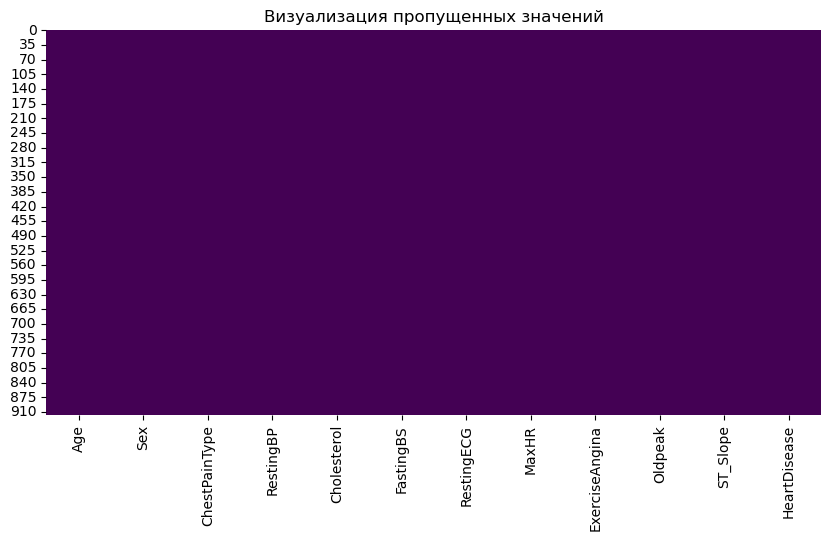


Пропуски успешно обработаны

3. ОБРАБОТКА ВЫБРОСОВ


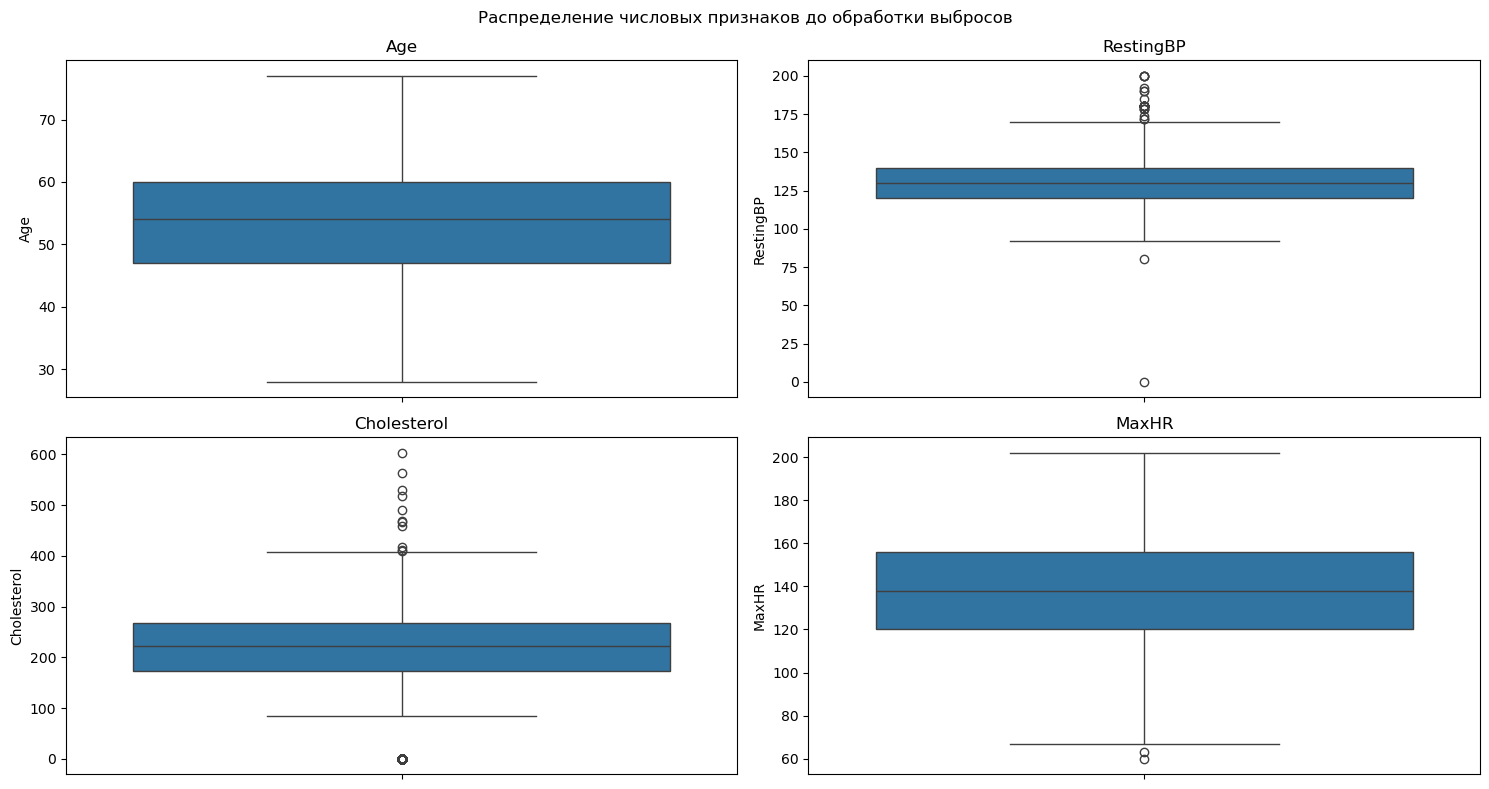


Размер датасета после удаления выбросов: (713, 12)

4. МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ

После масштабирования:
             count          mean       std       min       25%       50%  \
Age          713.0 -1.594486e-16  1.000702 -2.598574 -0.713109  0.124875   
RestingBP    713.0  3.251256e-16  1.000702 -2.571982 -0.755737 -0.107079   
Cholesterol  713.0  6.477599e-17  1.000702 -3.080232 -0.669228 -0.091384   
MaxHR        713.0 -1.096209e-16  1.000702 -2.847311 -0.755321 -0.016972   

                  75%       max  
Age          0.648615  2.534080  
RestingBP    0.541580  2.487556  
Cholesterol  0.645865  3.076794  
MaxHR        0.803417  2.526232  

5. КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

Уникальные значения до кодирования:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
RestingECG: ['Normal' 'ST' 'LVH']

Первые 5 строк после кодирования:
        Age  RestingBP  Cholesterol  FastingBS     MaxHR  Oldpeak ST_Slope  \
0 -1.341598   0.541580     0

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import fetch_openml

try:
    df = pd.read_csv('heart.csv')  # Предполагаем, что файл уже загружен
except FileNotFoundError:
    print("Файл не найден. Пожалуйста, загрузите данные с Kaggle и укажите правильный путь.")
    exit()
print("1. ОБЗОР ДАННЫХ")
print("\nИнформация о датасете:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe().transpose())
print("\n2. ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
print("\nКоличество пропусков до обработки:")
print(df.isna().sum())
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Визуализация пропущенных значений")
plt.show()
print("\nПропуски успешно обработаны")
print("\n3. ОБРАБОТКА ВЫБРОСОВ")
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.suptitle("Распределение числовых признаков до обработки выбросов")
plt.tight_layout()
plt.show()
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for col in numeric_cols:
    df = remove_outliers(df, col)
print("\nРазмер датасета после удаления выбросов:", df.shape)
print("\n4. МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ")
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nПосле масштабирования:")
print(df[numeric_cols].describe().transpose())
print("\n5. КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'RestingECG']
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_cols))
df_processed = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)
print("\nУникальные значения до кодирования:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
print("\nПервые 5 строк после кодирования:")
print(df_processed.head())
df_processed.to_csv('processed_heart_disease.csv', index=False)
print("\nОбработанные данные сохранены в файл 'processed_heart_disease.csv'")

# Индивидуальное задание

## 1. Обзор структуры данных
### Загрузите датасет.<br>Выведите общую информацию ( .info() , .describe() ).<br>Опишите: сколько признаков, каких типов, какова структура целевого признака.
## 2. Обнаружение и обработка пропусков
### Определите, есть ли пропущенные значения.<br>Обоснуйте выбранный способ их устранения (удаление, заполнение средним/модой и т.д.).<br>Примените выбранный способ.
## 3. Обнаружение и удаление выбросов
### Выберите 3–5 числовых признаков.<br>Используя метод IQR, удалите выбросы.<br>Сравните объём данных до и после очистки.
## 4. Масштабирование числовых признаков
### Выполните стандартизацию (z-преобразование) с помощью StandardScaler <br>Объясните, зачем выполняется масштабирование.
## 5.Кодирование категориальных признаков
### Выполните:<br>Label Encoding для порядковых признаков (при наличии);<br>One-Hot Encoding для номинальных признаков.<br>Проверьте, исключена ли дамми-ловушка.
## 6. Финальный набор данных
### Убедитесь, что датасет не содержит пропусков, выбросов, категориальных данных в строковом виде.<br>Признаки приведены к числовому виду, масштабированы.<br>Представьте итоговый DataFrame , готовый к использованию в моделях.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv("heart.csv")
print("Первые 5 строк:")
display(df.head())
print("\nИнформация о данных:")
display(df.info())
print("\nОписательная статистика числовых признаков:")
display(df.describe())
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
print(f"Размер до удаления выбросов: {df.shape}")
df_clean = df.copy()
for col in ['RestingBP', 'Cholesterol', 'MaxHR']:
    df_clean = remove_outliers(df_clean, col)
print(f"Размер после удаления выбросов: {df_clean.shape}")
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])
print("\nПосле масштабирования:")
display(df_clean.head())
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
print("\nПосле One-Hot Encoding:")
display(df_encoded.head())
print("Итоговый датасет (готов для модели):")
display(df_encoded.head())
print(f"\nРазмерность: {df_encoded.shape}")


Первые 5 строк:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None


Описательная статистика числовых признаков:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Размер до удаления выбросов: (918, 12)
Размер после удаления выбросов: (713, 12)

После масштабирования:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.341598,M,ATA,0.541580,0.984601,0,Normal,1.295650,N,-0.838056,Up,0
1,-0.398865,F,NAP,1.838897,-1.187295,0,Normal,0.639339,N,0.103684,Flat,1
2,-1.655842,M,ATA,-0.107079,0.865047,0,ST,-1.739787,N,-0.838056,Up,0
3,-0.503613,F,ASY,0.411848,-0.509823,0,Normal,-1.329593,Y,0.574554,Flat,1
4,0.124875,M,NAP,1.190239,-0.888410,0,Normal,-0.755321,N,-0.838056,Up,0



После One-Hot Encoding:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.341598,0.541580,0.984601,0,1.295650,-0.838056,0,True,True,False,False,True,False,False,False,True
1,-0.398865,1.838897,-1.187295,0,0.639339,0.103684,1,False,False,True,False,True,False,False,True,False
2,-1.655842,-0.107079,0.865047,0,-1.739787,-0.838056,0,True,True,False,False,False,True,False,False,True
3,-0.503613,0.411848,-0.509823,0,-1.329593,0.574554,1,False,False,False,False,True,False,True,True,False
4,0.124875,1.190239,-0.888410,0,-0.755321,-0.838056,0,True,False,True,False,True,False,False,False,True


Итоговый датасет (готов для модели):


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.341598,0.541580,0.984601,0,1.295650,-0.838056,0,True,True,False,False,True,False,False,False,True
1,-0.398865,1.838897,-1.187295,0,0.639339,0.103684,1,False,False,True,False,True,False,False,True,False
2,-1.655842,-0.107079,0.865047,0,-1.739787,-0.838056,0,True,True,False,False,False,True,False,False,True
3,-0.503613,0.411848,-0.509823,0,-1.329593,0.574554,1,False,False,False,False,True,False,True,True,False
4,0.124875,1.190239,-0.888410,0,-0.755321,-0.838056,0,True,False,True,False,True,False,False,False,True



Размерность: (713, 16)
